In [1]:
import pandas as pd
%matplotlib inline

In [3]:
from pathlib import Path
csvpath = Path('../Resources/yield.csv')
data = pd.read_csv(csvpath, parse_dates=True, index_col='Date')

In [4]:
data.head()

,Yield
Date,
1971-08-16,0.5632
1971-08-17,0.7108
1971-08-18,1.0657
1971-08-19,1.1335
1971-08-20,1.0313


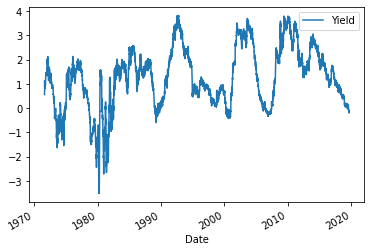

In [5]:
data.plot()

In [8]:
# Test to see if the data is stationary or non-stationary.
from statsmodels.tsa.stattools import adfuller
adfuller(data.Yield)

(-3.3937213506493373,
 0.011174781599654838,
 31,
 11943,
 {'1%': -3.430897660224935,
  '5%': -2.861782037578331,
  '10%': -2.566898831549907},
 -34557.309891380675)

# Autocorrelation and Partial Autocorrelation Analysis

Use the autocorrelation and partial autocorrelation data to get a sense of how many lags to use in the ARMA model.

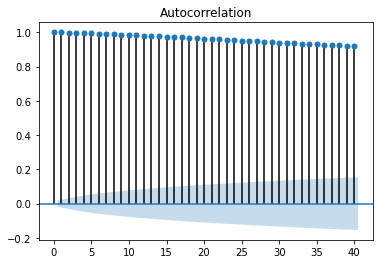

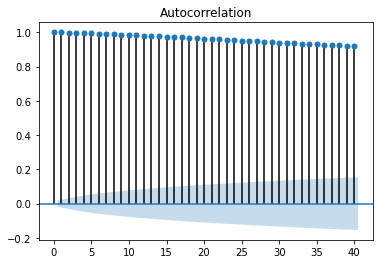

In [10]:
# Plot the autocorrelation of the yield data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data, lags=40)

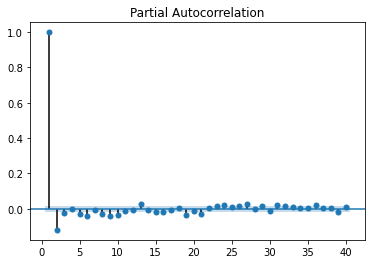

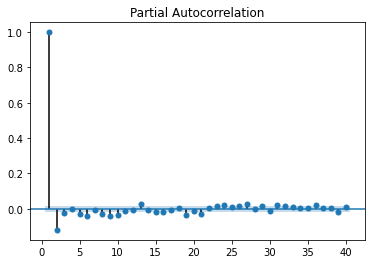

In [13]:
# Plot the partial autocorrelation of the yield data
plot_pacf(data, zero=False, lags=40)

How many lags should be used in the ARMA model?

The autocorrelation plot shows that all lags could potentially be useful. 

However, the partial autocorrelation plot shows most of the trend is in the first two lags.

# ARMA Model

Create an ARMA model and fit it to the data. Output the summary table and take note of the p-values of the lags.

Plot the Forecast for the next 5 days of yield changes

In [16]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(data.values, order=(2,2))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                11975
Model:                     ARMA(2, 2)   Log Likelihood               17294.672
Method:                       css-mle   S.D. of innovations              0.057
Date:                Tue, 01 Dec 2020   AIC                         -34577.344
Time:                        13:21:01   BIC                         -34533.001
Sample:                             0   HQIC                        -34562.468
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1823      0.318      3.713      0.000       0.558       1.806
ar.L1.y        1.9151      0.004    482.152      0.000       1.907       1.923
ar.L2.y       -0.9153      0.004   -230.820      0.000      -0.923      -0.908
ma.L1.y       -0.8033      0.010    -81.212      0.000      -0.823      -0.784
ma.L2.y       -0.0695      0.009     -7.674      0.000      -0.087      -0.052
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0025           +0.0000j            1.0025            0.0000
AR.2            1.0898           +0.0000j            1.0898            0.0000
MA.1            1.1338           +0.0000j            1.1338            0.0000
MA.2          -12.6984           +0.0000j           12.6984            0.5000
-----------------------------------------------------------------------------
"""

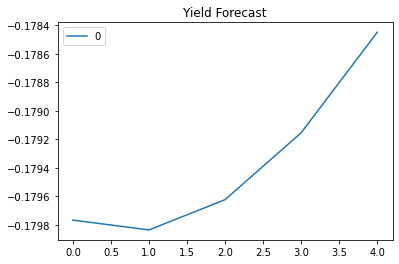

In [17]:
# Forecasting the future
pd.DataFrame(result.forecast(steps=5)[0]).plot(title='Yield Forecast')